# CONV Multi-step

https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

In [90]:
%config IPCompleter.greedy=True

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm.keras import TqdmCallback

import numpy as np
import random

random.seed(0)
np.random.seed(0)

from metrics import tdi_tdm, squared_error, absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [91]:
def plot_result(train, test, forecast):
    x = np.arange(train.shape[0] + test.shape[0])
    l = len(train)
    
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))
    axs[0].plot(x[:l], train, c='blue')
    axs[0].plot(x[l:], test, c='red')
    axs[0].plot(x[l:], forecast, c='green')
    axs[0].set_title(f"Prediction")
    
    axs[1].plot(x[l:], squared_error(test, forecast))
    axs[1].set_title(f"Squared errors")
    
    axs[2].plot(x[l:], absolute_error(test, forecast))
    axs[2].set_title(f"Absolute errors")
    plt.tight_layout()
    plt.show()

In [92]:
def predict_on_samples(model, x, y, n):
    
    forecast = model.predict(x[:n], verbose=0)
    
    for i in range(0, n):
        plot_result(x[i], y[i], forecast[i])
        print("(TDI, TDM): ", tdi_tdm(y[i], forecast[i]))

# CONV on ECG5000

In [93]:
# Parameters
window = 56
horizon = 84
n_features = 1

# Load data
df = pd.read_csv("./data/ECG5000/ECG5000_TRAIN.tsv", delimiter="\t", header=None).drop(0, axis=1)

x_train = np.expand_dims(df.values[:, :window], axis=2)  # unsqueeze
y_train = df.values[:, window:]

# Load data
df = pd.read_csv("./data/ECG5000/ECG5000_TEST.tsv", delimiter="\t", header=None).drop(0, axis=1)

x_test = np.expand_dims(df.values[:, :window], axis=2)  # unsqueeze
y_test = df.values[:, window:]


# Build model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(horizon))
model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=100, verbose=0, callbacks=[TqdmCallback(verbose=1)])

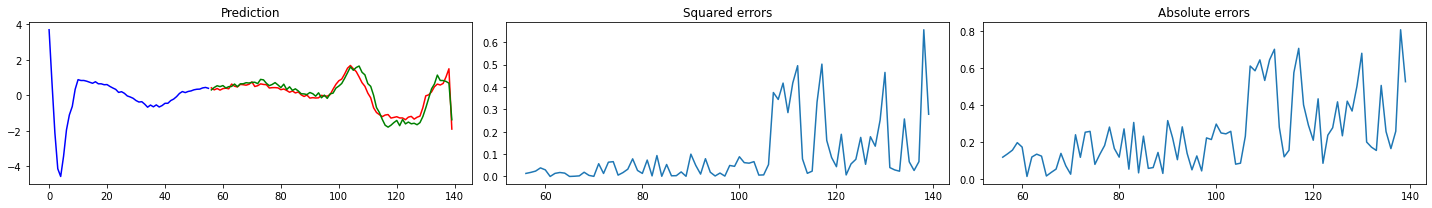

(TDI, TDM):  (0.06405895691609978, 0.24778761061946897)


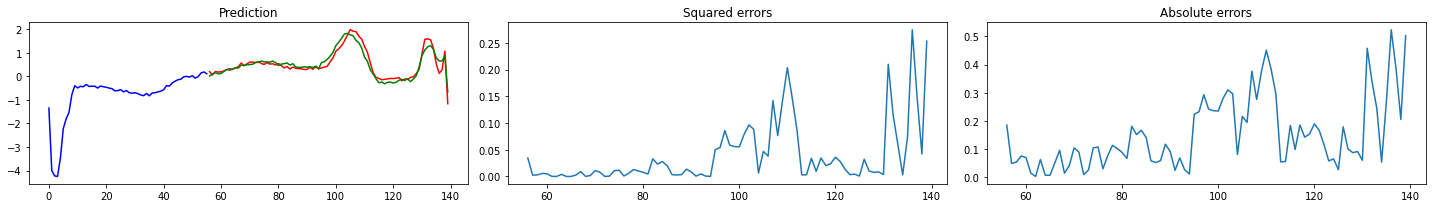

(TDI, TDM):  (0.05697278911564626, 0.3034825870646767)


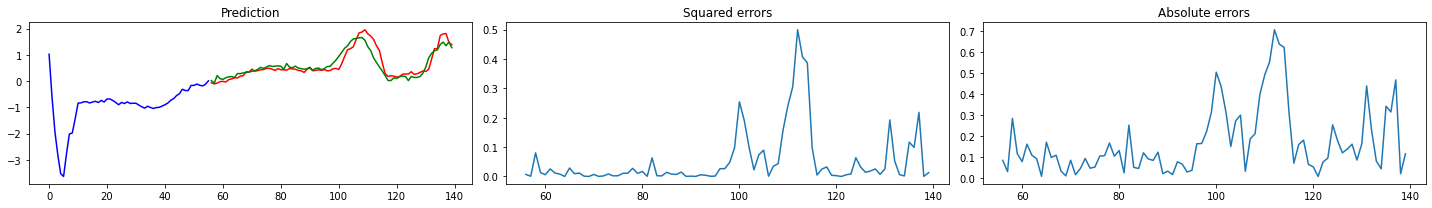

(TDI, TDM):  (0.09013605442176871, -0.729559748427673)


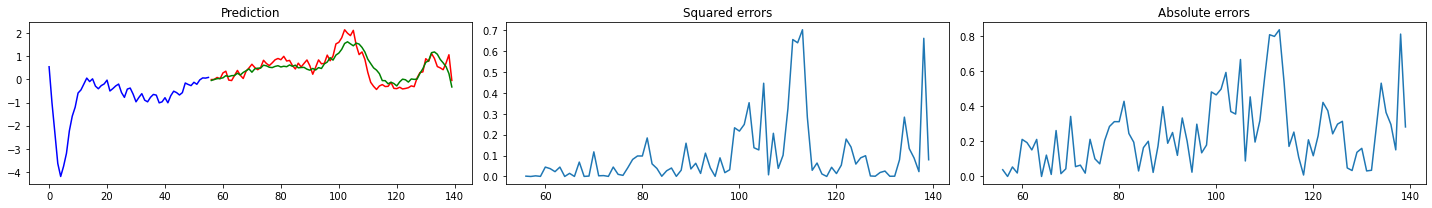

(TDI, TDM):  (0.05612244897959184, 0.5101010101010102)


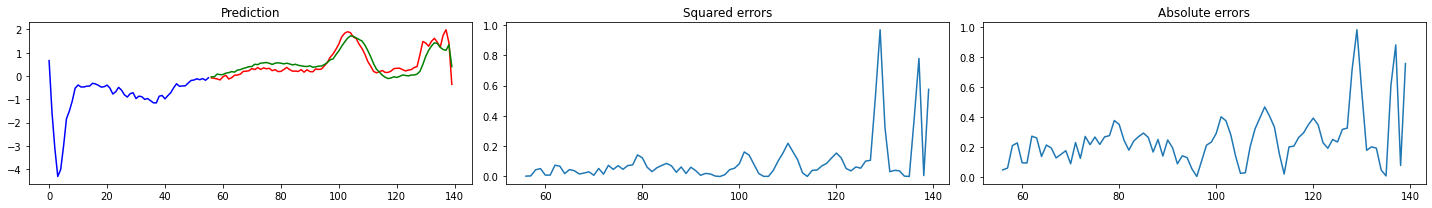

(TDI, TDM):  (0.17970521541950113, -0.525236593059937)


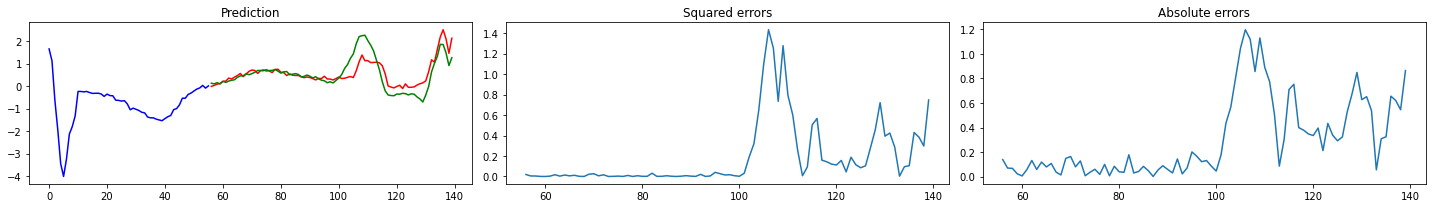

(TDI, TDM):  (0.050170068027210885, 0.17514124293785316)


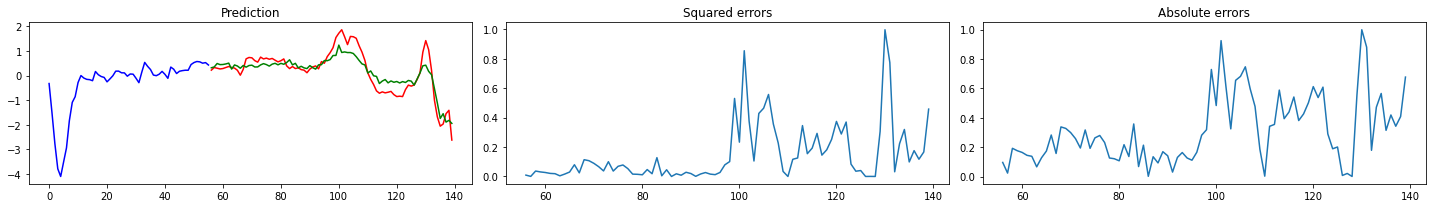

(TDI, TDM):  (0.09382086167800453, 0.6767371601208458)


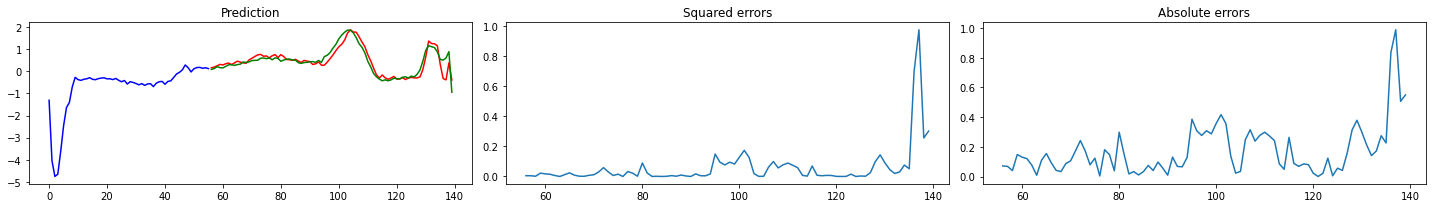

(TDI, TDM):  (0.059098639455782316, -0.47242206235011985)


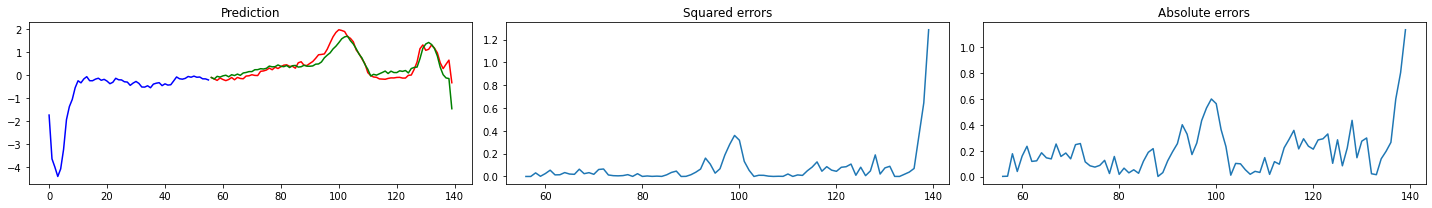

(TDI, TDM):  (0.08786848072562359, -0.532258064516129)


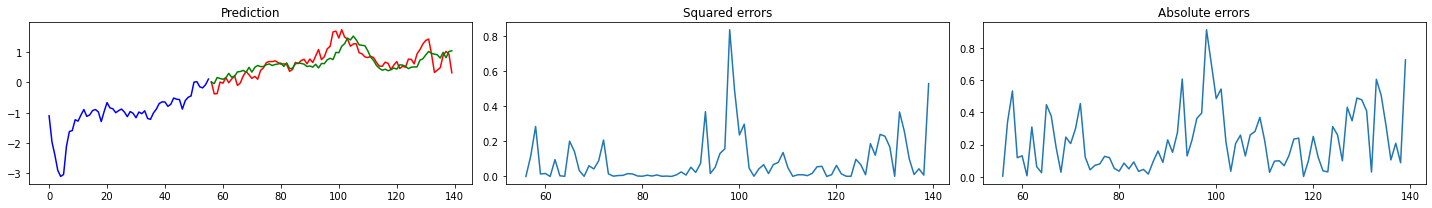

(TDI, TDM):  (0.0663265306122449, 0.10256410256410264)


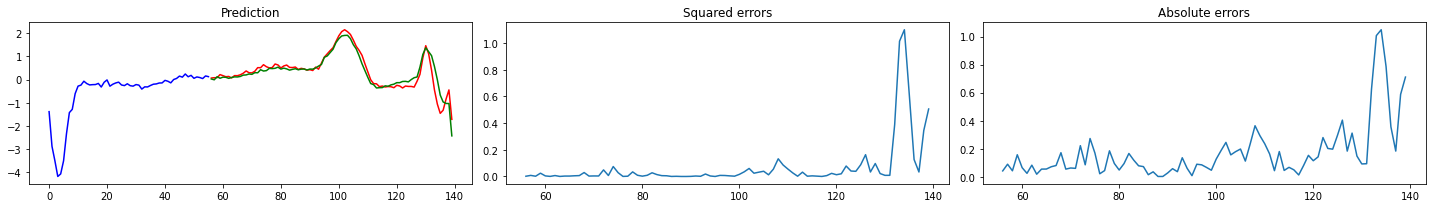

(TDI, TDM):  (0.060515873015873016, -0.09133489461358313)


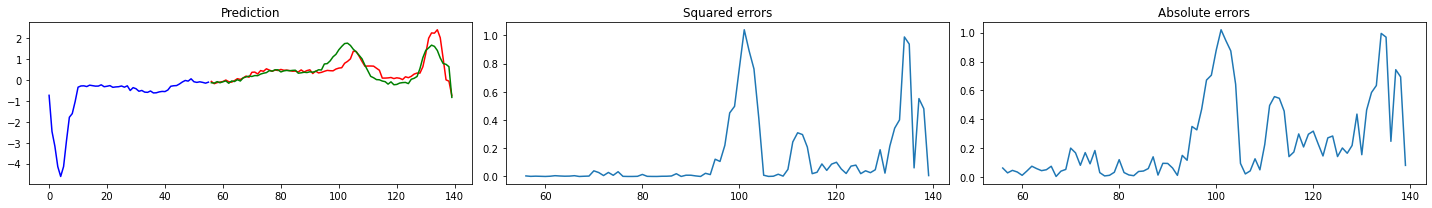

(TDI, TDM):  (0.06448412698412699, -0.5340659340659341)


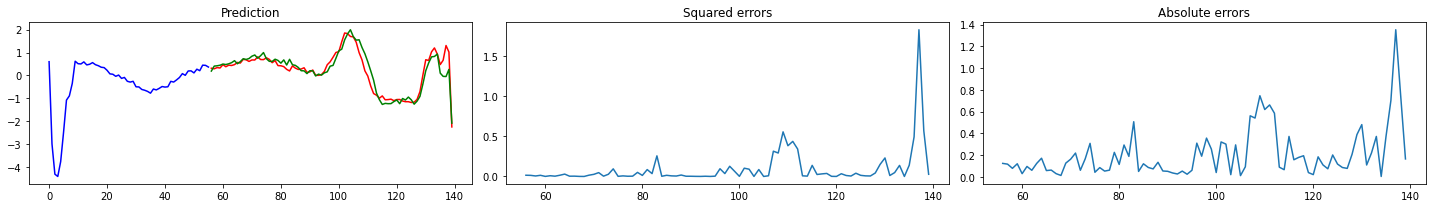

(TDI, TDM):  (0.05555555555555556, -0.18877551020408168)


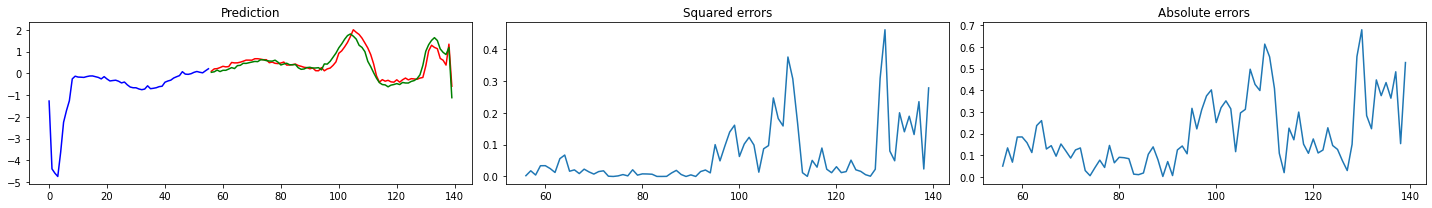

(TDI, TDM):  (0.07142857142857142, 0.4563492063492063)


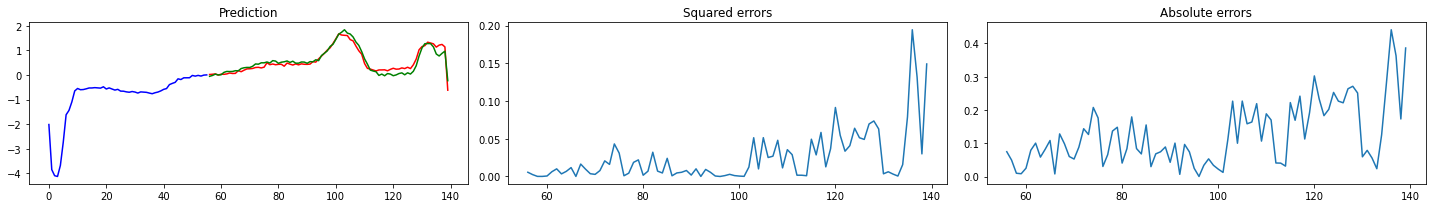

(TDI, TDM):  (0.10317460317460318, -0.4010989010989011)


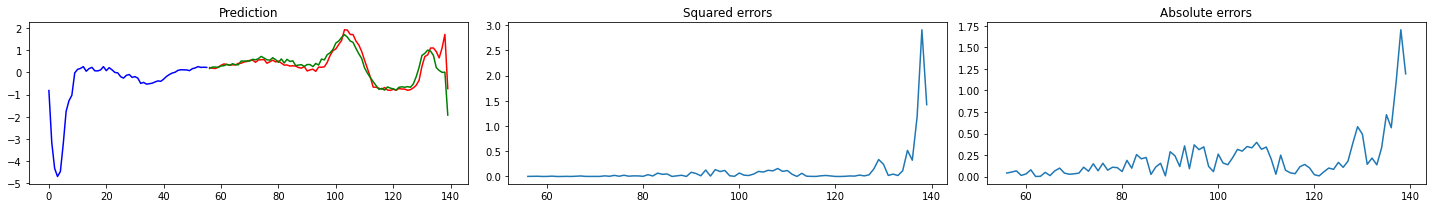

(TDI, TDM):  (0.049178004535147396, -0.2334293948126801)


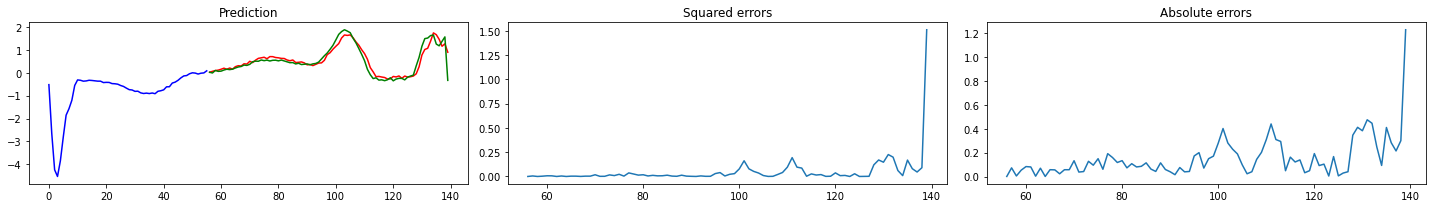

(TDI, TDM):  (0.05002834467120182, -0.37110481586402266)


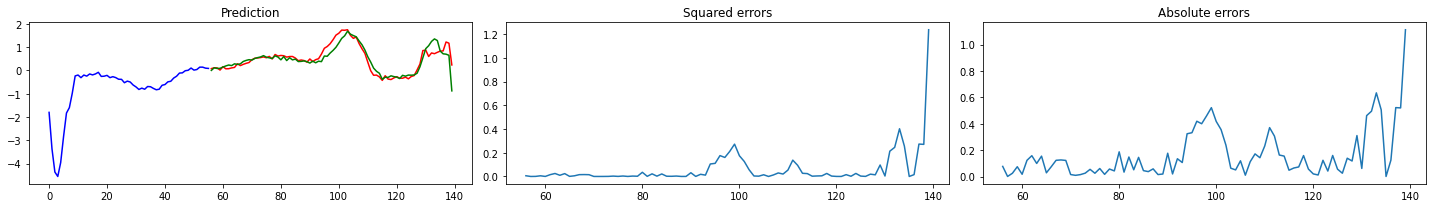

(TDI, TDM):  (0.04903628117913832, -0.5086705202312138)


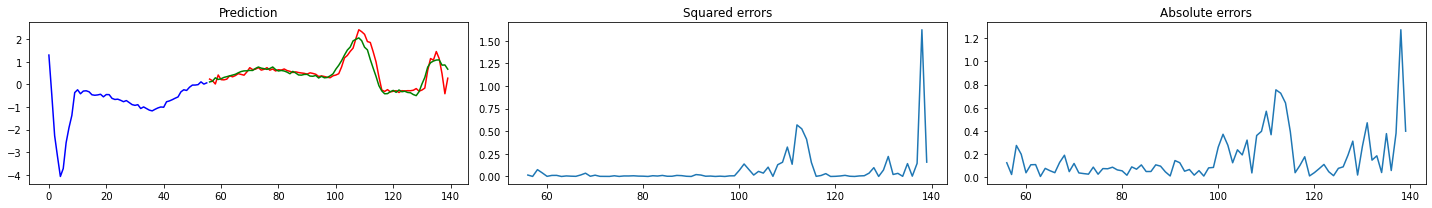

(TDI, TDM):  (0.04861111111111111, -0.34693877551020413)


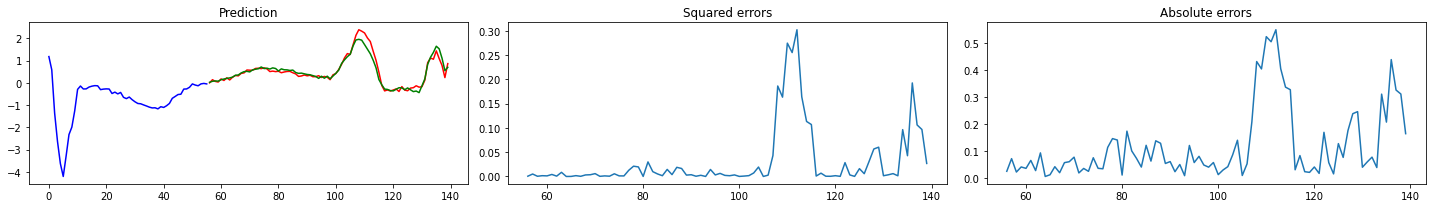

(TDI, TDM):  (0.035572562358276646, 0.6414342629482073)


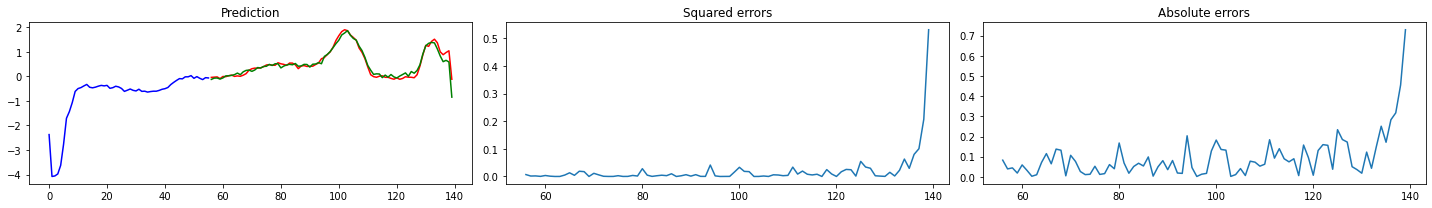

(TDI, TDM):  (0.035572562358276646, -0.4183266932270916)


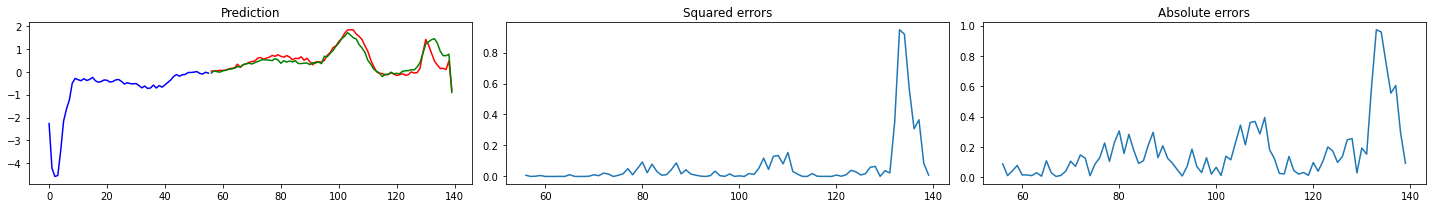

(TDI, TDM):  (0.05668934240362812, -0.42000000000000004)


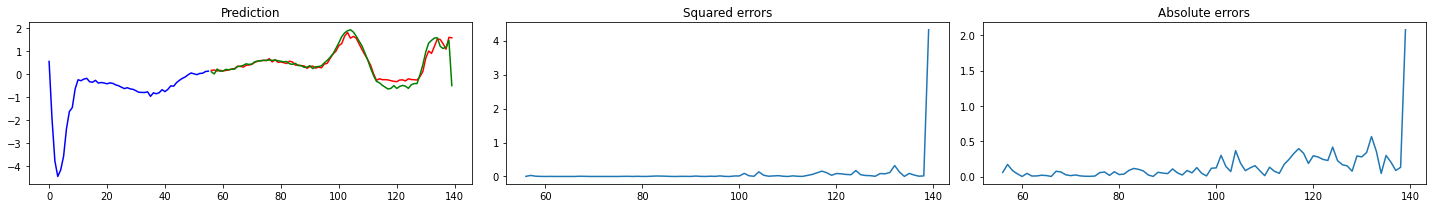

(TDI, TDM):  (0.030753968253968256, -0.09677419354838712)


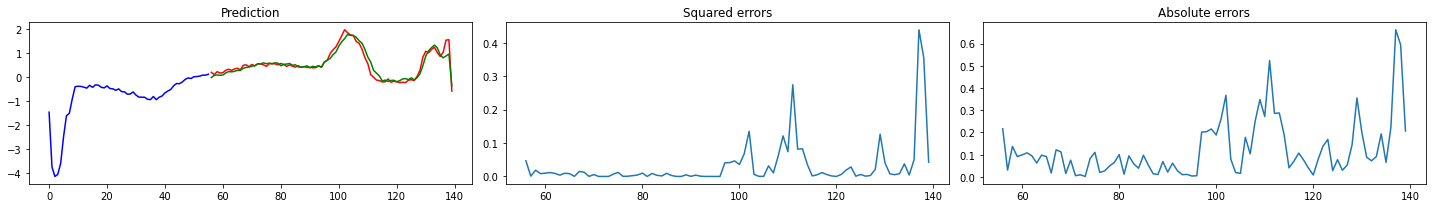

(TDI, TDM):  (0.04265873015873016, 0.8205980066445182)


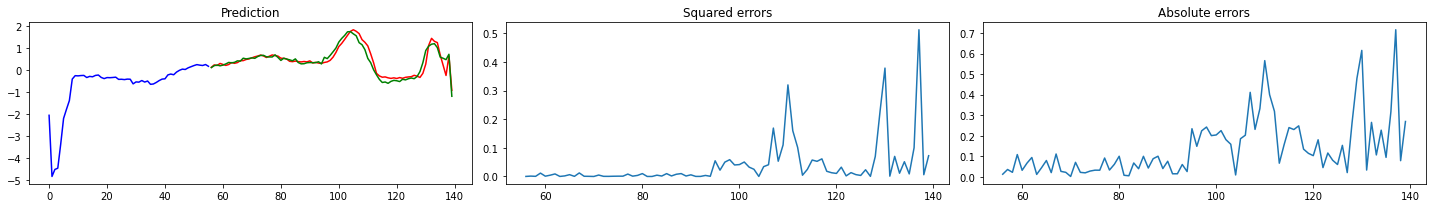

(TDI, TDM):  (0.042091836734693876, -0.5016835016835017)


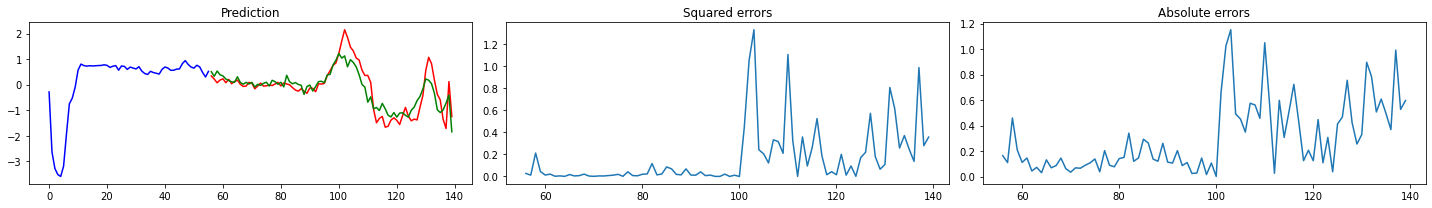

(TDI, TDM):  (0.04180839002267574, 0.13898305084745766)


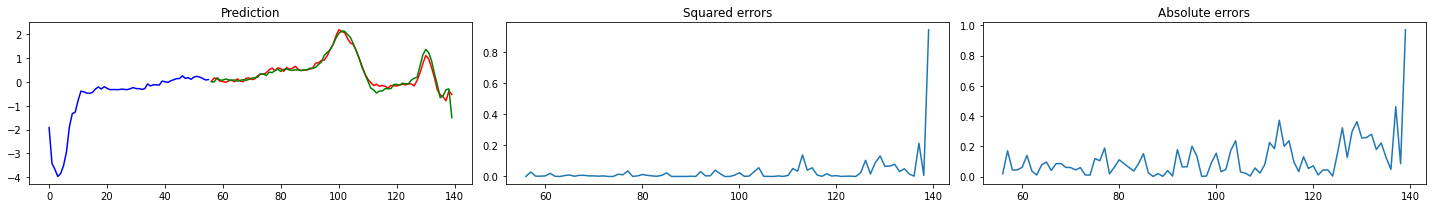

(TDI, TDM):  (0.03160430839002268, 0.004484304932735439)


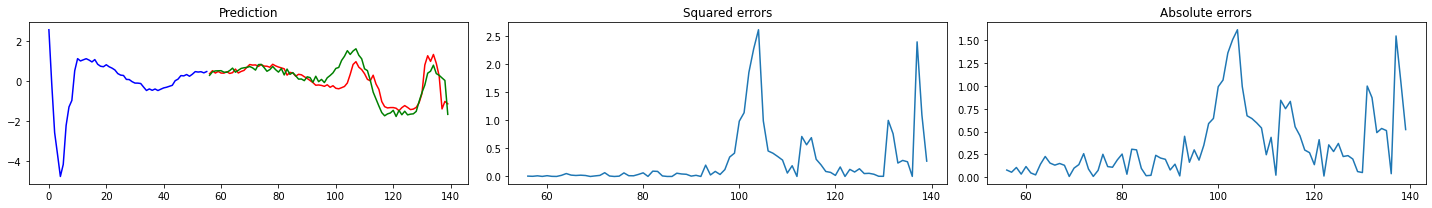

(TDI, TDM):  (0.059807256235827666, -0.4597156398104265)


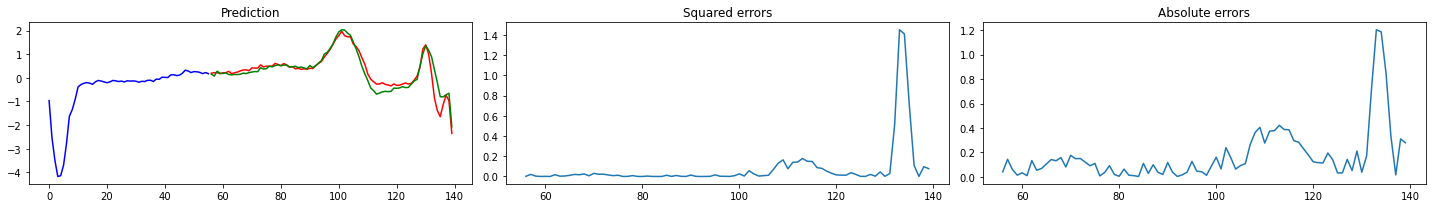

(TDI, TDM):  (0.0391156462585034, 0.42028985507246386)


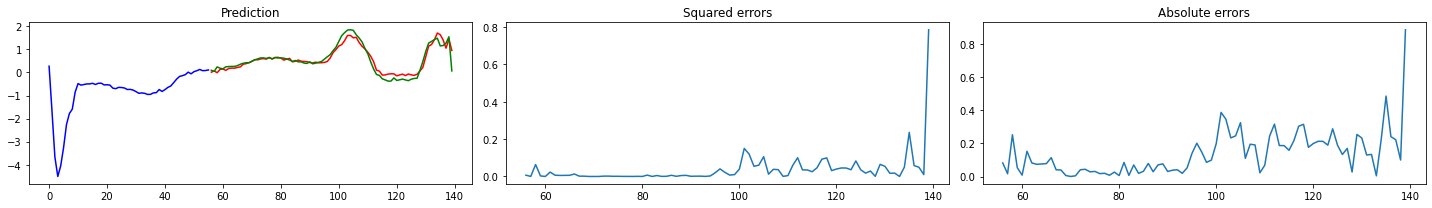

(TDI, TDM):  (0.04974489795918367, -0.9145299145299145)


In [94]:
# Forecasts      
predict_on_samples(model, x_test, y_test, 30)

# CONV on Traffic